In [22]:
author_year = "lee24"
dataset_id = "GSE244515"
url = "https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE244515"

In [47]:
import os
import logging
import warnings
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [32]:
import tarfile
import os

# Path to the .tar file you downloaded
tar_file = "GSE244515_RAW.tar"

# Directory where you want to extract the contents
extract_dir = "GSE244515_RAW"

# Open the tar file and extract its contents
with tarfile.open(tar_file, "r") as tar:
    # Check if the extraction directory exists, if not, create it
    if not os.path.exists(extract_dir):
        os.makedirs(extract_dir)
    
    # Extract all files to the specified directory
    tar.extractall(path=extract_dir)

# Remove the .tar file after extraction
if os.path.exists(tar_file):
    os.remove(tar_file)
    print(f"Removed {tar_file}")

print(f"Extracted all files to {extract_dir} and removed the .tar file!")

Removed GSE244515_RAW.tar
Extracted all files to GSE244515_RAW and removed the .tar file!


In [33]:
#Q: Why are we making another file directory instead of using extract_dir?
data_dir = "GSE244515_RAW"

# Function to load data for each sample
def load_sample(prefix):
    return sc.read_10x_mtx(
        data_dir, 
        #Q: wouldn't you need to know the contents of your data to know gene_symbols exists? How can I view this in my data? 
        var_names='gene_symbols',  # Use gene symbols as var names
        prefix=prefix,  # Prefix for the files
        cache=False
    )

# Get a list of all files in the directory
all_files = os.listdir(data_dir)

#Q: Go over the different peices of this syntax?
# Get the unique prefixes by identifying unique parts of the filenames before '_matrix.mtx.gz'
prefixes = sorted(set(f.split('matrix.mtx.gz')[0] for f in all_files if 'matrix.mtx.gz' in f))

# List to store the loaded AnnData objects
adatas = []

# Loop over prefixes and load the corresponding sample data
for prefix in prefixes:
    adata = load_sample(prefix)
    adatas.append(adata)
    print(f"Loaded {prefix}")

Loaded GSM7818495_H1_
Loaded GSM7818496_H2_
Loaded GSM7818497_H3_
Loaded GSM7818498_H4_
Loaded GSM7818499_H5_
Loaded GSM7818500_H6_
Loaded GSM7818501_H7_
Loaded GSM7818502_H8_
Loaded GSM7818503_H9_
Loaded GSM7818504_H10_
Loaded GSM7818505_H11_
Loaded GSM7818506_PD1_
Loaded GSM7818507_PD2_
Loaded GSM7818508_PD3_
Loaded GSM7818509_PD4_
Loaded GSM7818510_PD5_
Loaded GSM7818511_PD6_
Loaded GSM7818512_PD7_
Loaded GSM7818513_PD8_
Loaded GSM7818514_PD9_
Loaded GSM7818515_PD10_
Loaded GSM7818516_PDDM1_
Loaded GSM7818517_PDDM2_
Loaded GSM7818518_PDDM3_
Loaded GSM7818519_PDDM4_
Loaded GSM7818520_PDDM5_
Loaded GSM7818521_PDDM6_


In [34]:
#Assigns a sample identifier to each cell in each AnnData object
for prefix, adata in zip(prefixes, adatas):
    adata.obs['sample_id'] = prefix.strip('_')

In [35]:
adata.obs

,sample_id
AAACCCAAGCGATGCA-1,GSM7818521_PDDM6
AAACCCAAGTGCACAG-1,GSM7818521_PDDM6
AAACCCACACCAGACC-1,GSM7818521_PDDM6
AAACCCACAGTCTCTC-1,GSM7818521_PDDM6
AAACCCACATTAAGCC-1,GSM7818521_PDDM6
...,...
TTTGTTGGTGGTCCGT-1,GSM7818521_PDDM6
TTTGTTGTCATTTACC-1,GSM7818521_PDDM6
TTTGTTGTCGCCAATA-1,GSM7818521_PDDM6
TTTGTTGTCGCTACGG-1,GSM7818521_PDDM6


In [36]:
adatas

[AnnData object with n_obs × n_vars = 9413 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 9363 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12472 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12445 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 21565 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 6000 × 33538
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 8934 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 9341 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feature_types',
 AnnData object with n_obs × n_vars = 12526 × 36601
     obs: 'sample_id'
     var: 'gene_ids', 'feat

In [37]:
#Concatenates all the AnnData objects in the adatas list into a single AnnData object 
#Gives us a unified dataset thhat contains all cells from all samples
adata = sc.concat(adatas)

/opt/miniconda3/envs/scanpy_env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
adata

AnnData object with n_obs × n_vars = 308665 × 31915
    obs: 'sample_id'

In [41]:
# Display the first few rows of adata.var to understand its structure
adata.var.head()

""
MIR1302-2HG
FAM138A
OR4F5
AL627309.1
AL627309.3


In [42]:
print(adata.var_names[:5])

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3'], dtype='object')


In [ ]:
#After noting adata_var and adata.var_names have matching values, I am creating a new colum called gene_symbols for readability
adata.var['gene_symbols'] = adata.var_names


In [43]:
# Mitochondrial genes (MT- prefix)
adata.var["mt"] = adata.var_names.str.startswith("MT-")

# MicroRNA host genes (MIR prefix)
adata.var["mir"] = adata.var_names.str.startswith("MIR")

# Family with sequence similarity genes (FAM prefix)
adata.var["fam"] = adata.var_names.str.startswith("FAM")

# Olfactory receptor genes (OR prefix)
adata.var["or"] = adata.var_names.str.startswith("OR")

# Long non-coding RNA genes or pseudogenes 
adata.var["lncRNA"] = adata.var_names.str.startswith("AL")


In [44]:
adata.var.loc[adata.var["mt"]]

,mt,mir,fam,or,lncRNA
MT-ND1,True,False,False,False,False
MT-ND2,True,False,False,False,False
MT-CO1,True,False,False,False,False
MT-CO2,True,False,False,False,False
MT-ATP8,True,False,False,False,False
MT-ATP6,True,False,False,False,False
MT-CO3,True,False,False,False,False
MT-ND3,True,False,False,False,False
MT-ND4L,True,False,False,False,False
MT-ND4,True,False,False,False,False


In [45]:
#The issue here is that since I didn't have ribo data, this isn't good quality control. 
#Q: How do I fix this? Need to find this missing data.
# Calculate QC metrics for the specified gene categories
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt", "mir", "fam", "or", "lncRNA"],  # Use your gene categories here
    inplace=True,
    log1p=True
)

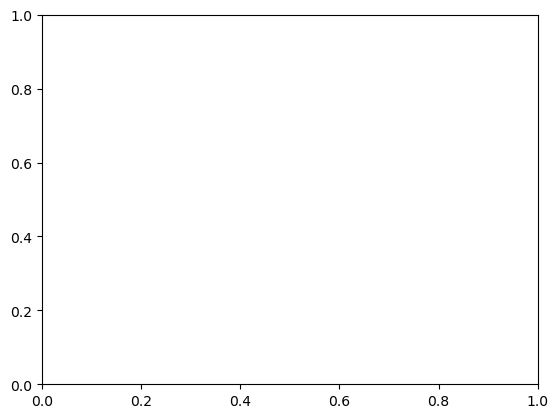

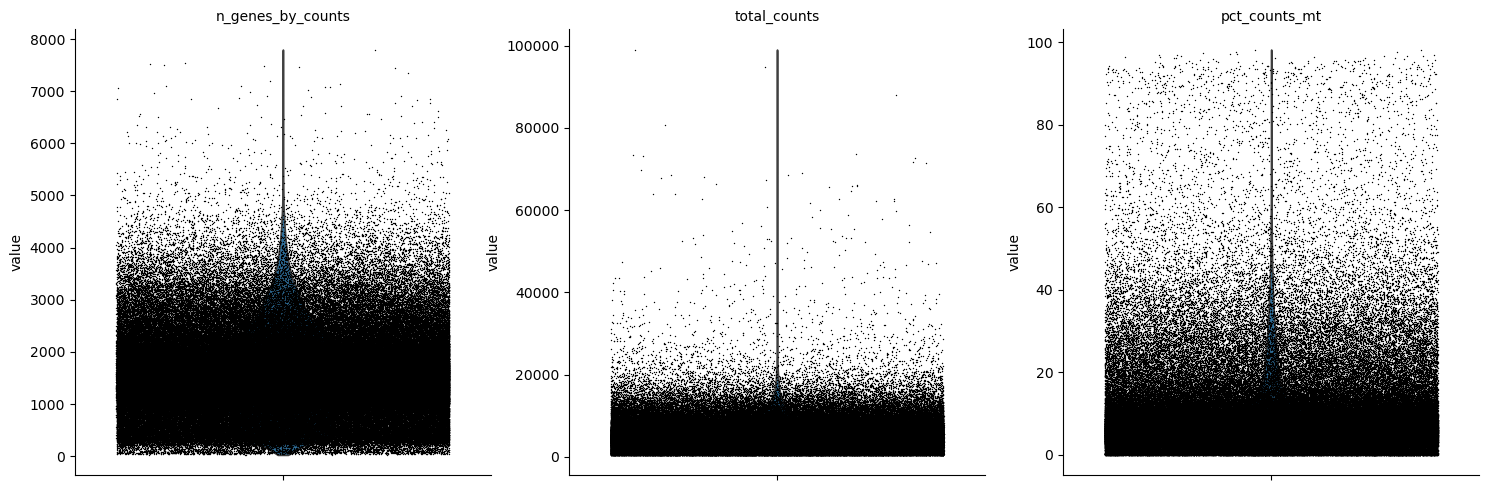

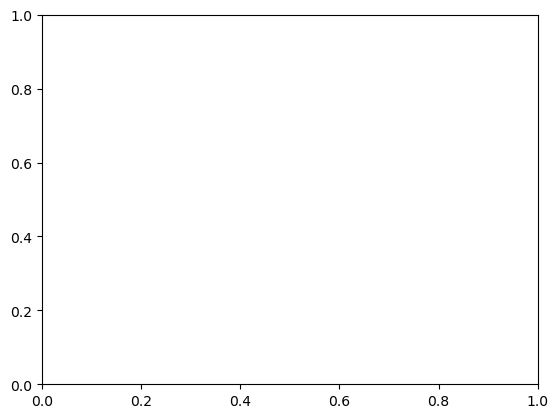

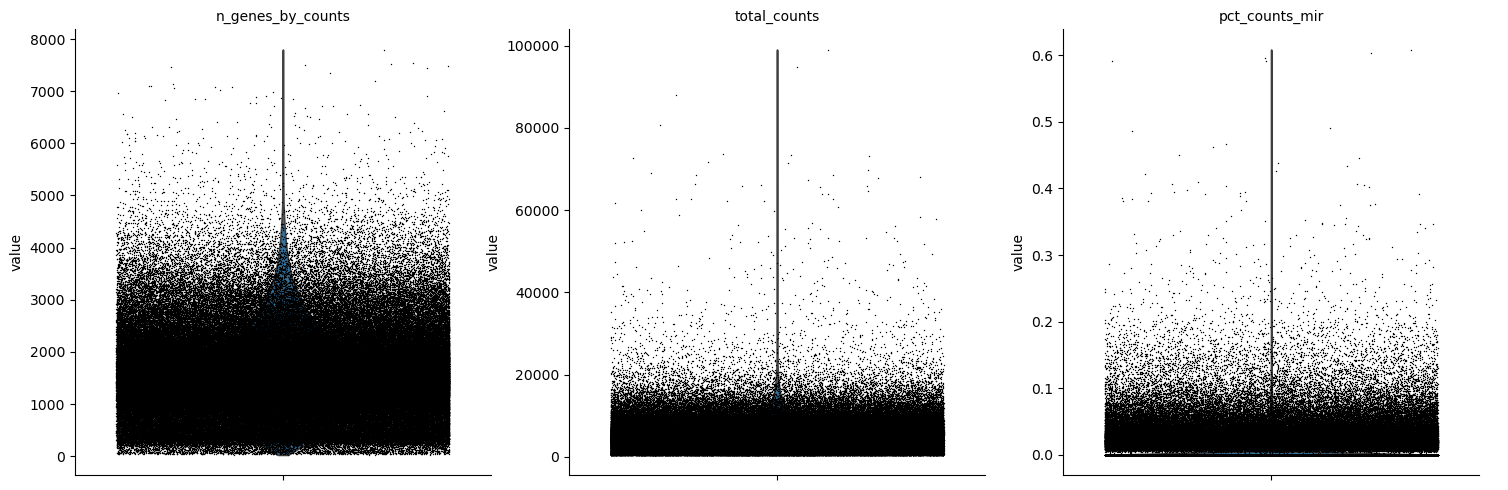

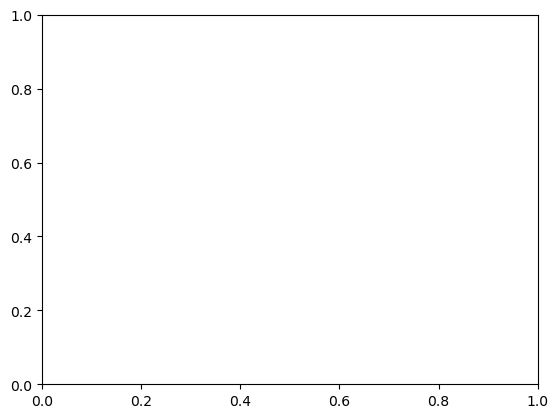

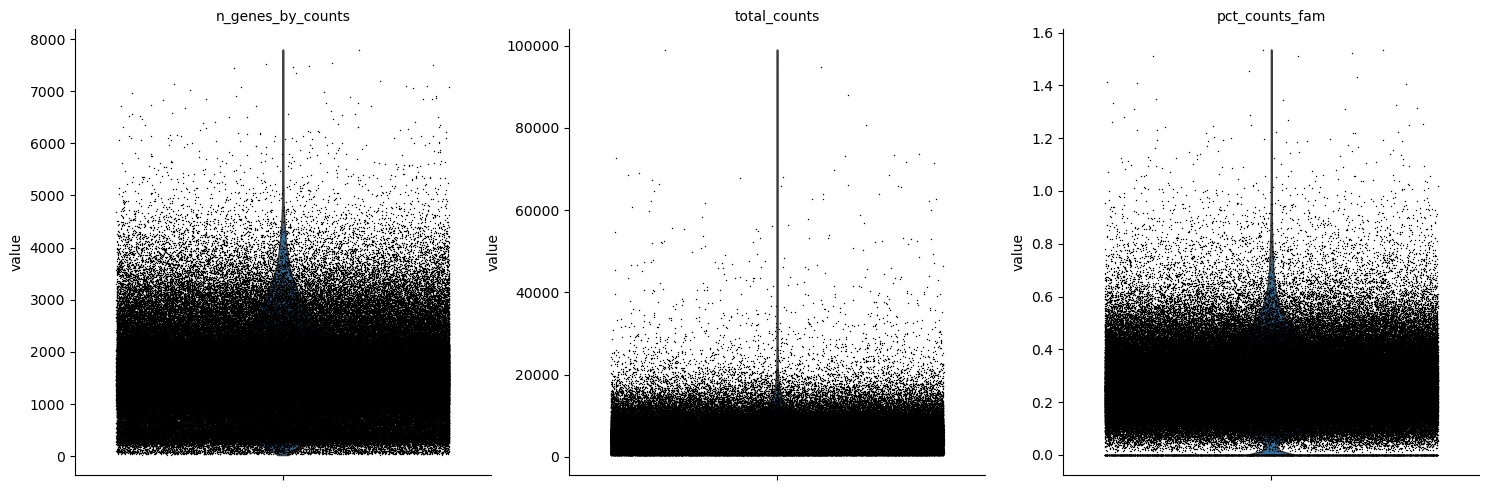

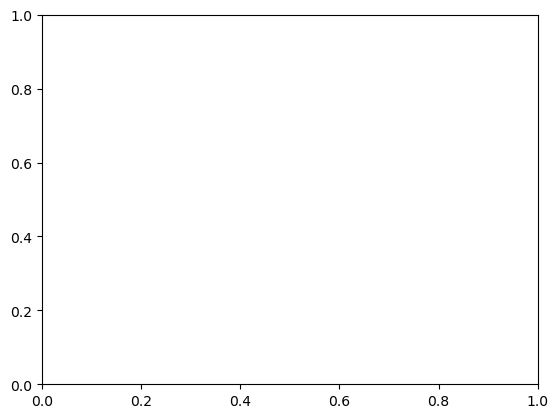

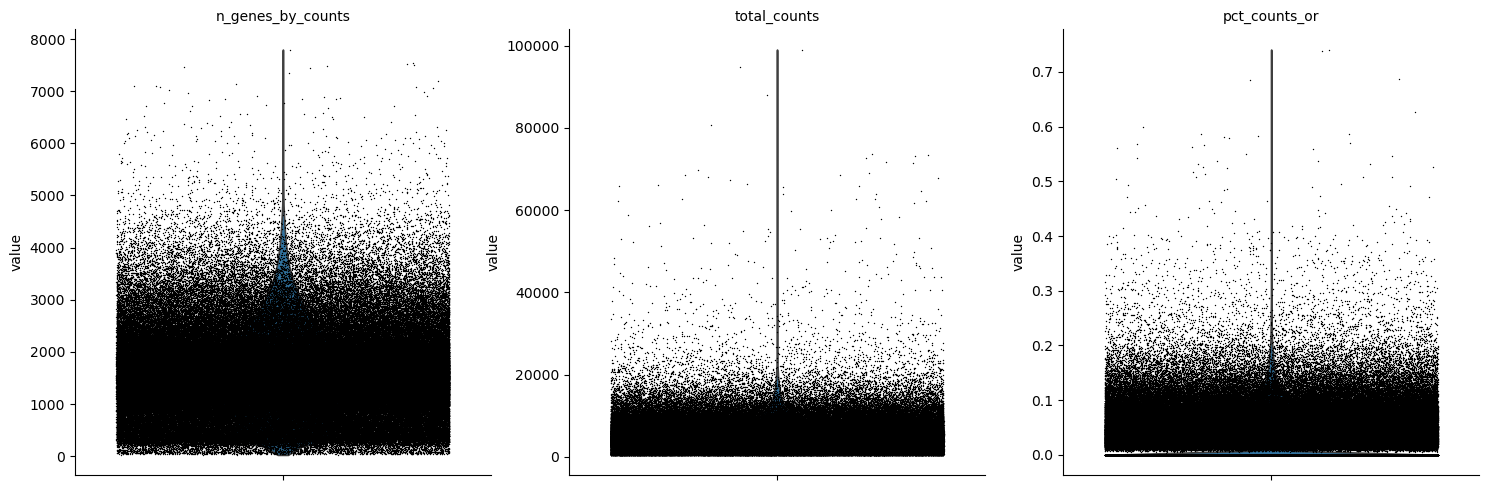

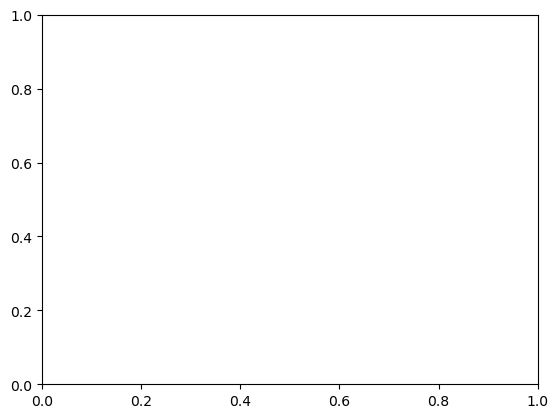

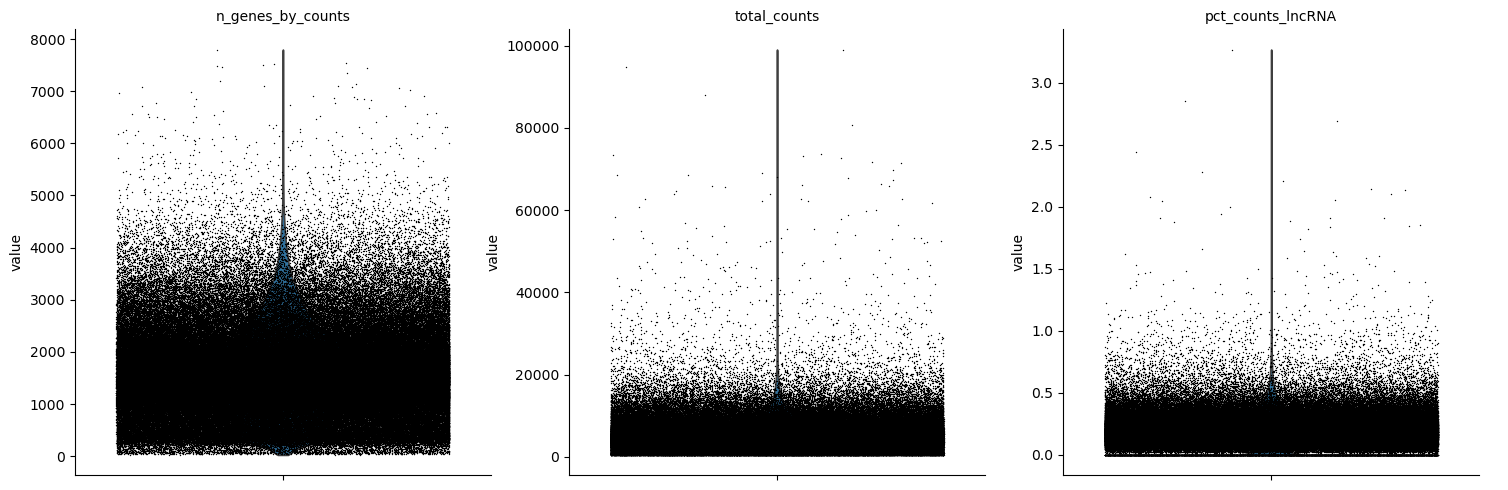

In [50]:
# Mitochondrial gene plot
#Q: Why is this charting empty?
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True)
plt.title("Mitochondrial Genes")

# MicroRNA genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_mir"], jitter=0.4, multi_panel=True)
plt.title("Micro-RNA Genes")

# Family similarity genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_fam"], jitter=0.4, multi_panel=True)
plt.title("Family Similarity Genes")

# Olfactory receptor genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_or"], jitter=0.4, multi_panel=True)
plt.title("Olfactory Receptor Genes")

# Long non-coding RNA genes plot
sc.pl.violin(adata, ["n_genes_by_counts", "total_counts", "pct_counts_lncRNA"], jitter=0.4, multi_panel=True)
plt.title("Long non-coding RNA Genes/pseudogenes")